# Adaptive Thresholding and Niblack's Thresholding

## Importing Necessary Libraries

In [1]:
%matplotlib inline

import argparse
import cv2
from matplotlib import pyplot as plt

# scikit-image
from skimage.filters import (threshold_otsu, threshold_niblack, threshold_sauvola)
from skimage.io import imsave
from skimage import img_as_uint

## Function for Displaying Images

In [2]:
# Display image
def display_img(image):
    # load image using cv2....and do processing.
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # As opencv loads in BGR format by default, we want to show it in RGB.
    plt.show()

    return

## Read the Image

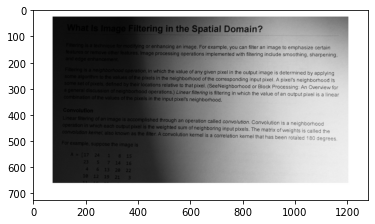

In [3]:
# Load the image and display it
image = cv2.imread('../resources/input_image.jpeg')

# Display the image
display_img(image)

## Convert the Image to Grayscale

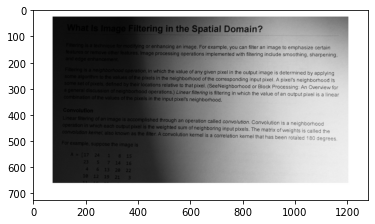

In [4]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_img(gray)

## Global Thresholding Techniques for Comparison

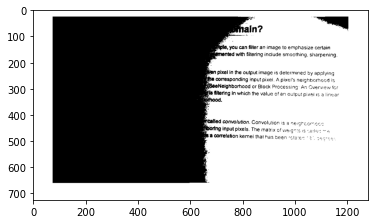

In [5]:
# Apply Otsu's automatic thresholding
(T, threshInv) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

threshInv = 255 - threshInv
display_img(threshInv)

## Adaptive Thresholding

### With Arithmetic Mean

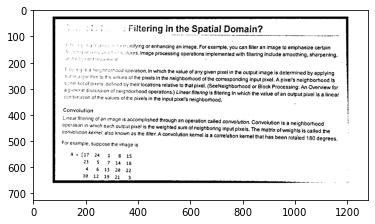

In [6]:
# Here adaptive thresholding is done through arithmetic mean
thresh_arithmetic = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)

thresh_arithmetic = 255 - thresh_arithmetic

display_img(thresh_arithmetic)

### With Gaussian Mean

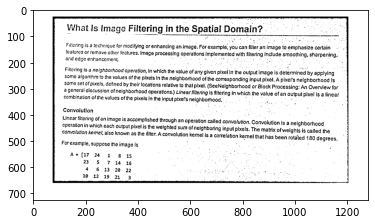

In [7]:
# Here adaptive thresholding is done through Gaussian mean
thresh_gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)

thresh_gauss = 255 - thresh_gauss

display_img(thresh_gauss)

## Niblack's Thresholding

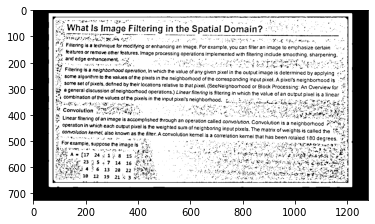

In [8]:
window_size = 25
thresh_niblack = threshold_niblack(gray, window_size=window_size, k=0.8)
binary_niblack = gray > thresh_niblack

plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.show()